# Count of passengers by class

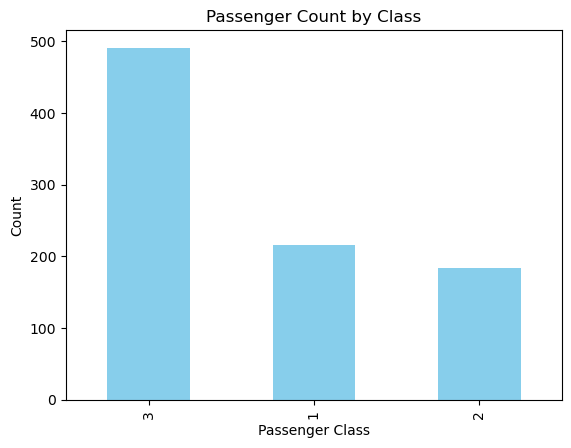

In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

df = sns.load_dataset('titanic')


df['pclass'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Passenger Count by Class')
plt.xlabel('Passenger Class')
plt.ylabel('Count')
plt.show()

### Without Matplotlib

<Axes: xlabel='pclass', ylabel='count'>

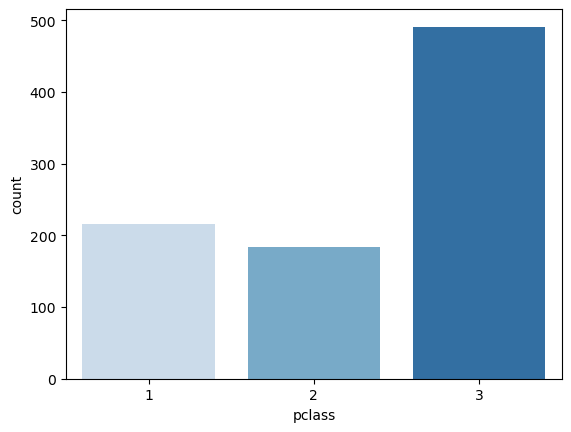

In [2]:
import seaborn as sns
import pandas as pd

class_counts = df['pclass'].value_counts().reset_index()
class_counts.columns = ['pclass', 'count']

sns.barplot(x='pclass', y='count', data=class_counts, palette='Blues') # Using Seaborn's barplot

# Creating a frequency table for 'class' column

In [21]:
frequency_table = df['class'].value_counts()
print("Frequency Table:\n", frequency_table)

Frequency Table:
 Third     491
First     216
Second    184
Name: class, dtype: int64


# finding min/max

# Droping NaN values in the 'age' column before finding min/max

In [22]:
df_cleaned = df.dropna(subset=['age'])

# Find the oldest and youngest passenger

In [24]:
oldest_passenger = df_cleaned.loc[df_cleaned['age'].idxmax()]
youngest_passenger = df_cleaned.loc[df_cleaned['age'].idxmin()]

print("\nOldest Passenger Details:")
print(oldest_passenger[['who', 'age', 'pclass', 'sex']])

print("\nYoungest Passenger Details:")
print(youngest_passenger[['who', 'age', 'pclass', 'sex']])


Oldest Passenger Details:
who        man
age       80.0
pclass       1
sex       male
Name: 630, dtype: object

Youngest Passenger Details:
who       child
age        0.42
pclass        3
sex        male
Name: 803, dtype: object


# Identify passengers who traveled alone

In [26]:
df['travel_alone'] = df.apply(lambda row: 'Yes' if row['sibsp'] + row['parch'] == 0 else 'No', axis=1)

# Count how many traveled alone

In [27]:
solo_travelers_count = df['travel_alone'].value_counts()
print("\nNumber of passengers who traveled alone:")
print(solo_travelers_count)


Number of passengers who traveled alone:
Yes    537
No     354
Name: travel_alone, dtype: int64


# 1. Find the passenger who paid the highest fare

# 2. Count number of survivors by gender

# 3. Calculate average fare by gender

# variance, and standard deviation

In [6]:
variance = df['age'].var()
std_dev = df['age'].std()
print('variance:',variance)
print('standard deviation:',std_dev)

variance: 211.0191247463081
standard deviation: 14.526497332334044


## Correlation: Measures the relationship between two variables

$ r = \frac{\sum (X_i - \bar{X})(Y_i - \bar{Y})}{\sqrt{\sum (X_i - \bar{X})^2} \cdot \sqrt{\sum (Y_i - \bar{Y})^2}}$


### Correlation between 'age' and 'fare'


Correlation Matrix:
            age      fare
age   1.000000  0.096067
fare  0.096067  1.000000

Correlation Coefficient between Age and Fare: 0.09606669176903887


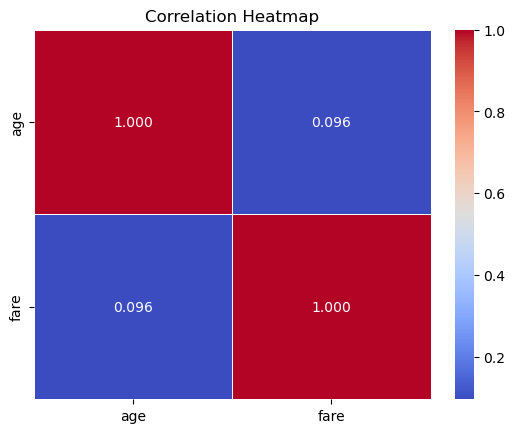

In [14]:
correlation_matrix = df[['age', 'fare']].corr()
correlation_coefficient = df['age'].corr(df['fare'])
print("\nCorrelation Matrix:\n", correlation_matrix)
print("\nCorrelation Coefficient between Age and Fare:", correlation_coefficient)
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".3f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

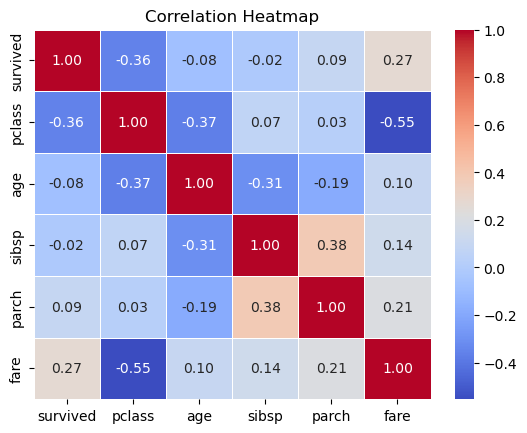

In [9]:
numeric_df = df.select_dtypes(include=['number']).dropna() # Select numerical values and remove Nan values

correlation = numeric_df.corr()

sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()
